In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [31]:
def detect_otliers(x): 
    """ Función que detecta outliers en una variable """
    Q3 = df[x].quantile(0.75)
    Q1 = df[x].quantile(0.25)
    IQR = Q3 - Q1
    superior = Q3 + (1.5 * IQR)
    inferior = Q1 - (1.5 * IQR)
    out_sup = df[df[x] > superior].index
    out_inf = df[df[x] < inferior].index
    outliers = []
    for i in out_sup:
        outliers.append(i)
        for j in out_inf:
            outliers.append(j)
    
    size = len(outliers)
        
    return (f'Hay {size} valores atípicos en la variable {x}, y corresponden a los índices: {outliers}')

detect_otliers('bmi')

'Hay 9 valores atípicos en la variable bmi, y corresponden a los índices: [116, 286, 401, 543, 847, 860, 1047, 1088, 1317]'

<AxesSubplot: >

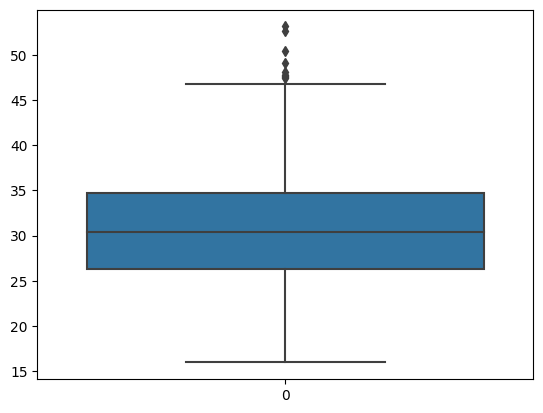

In [56]:
sns.boxplot(df['bmi'])

In [33]:
df.iloc[[116, 286, 401, 543, 847, 860, 1047, 1088, 1317], :]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [24]:
# Eliminamos los valores atípicos
# df.drop([116, 286, 401, 543, 847, 860, 1047, 1088, 1317], inplace=True)

<AxesSubplot: >

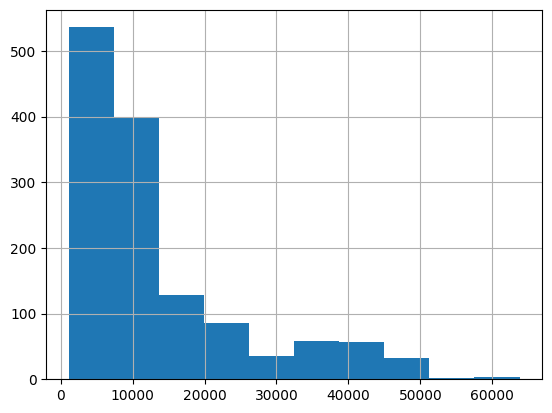

In [34]:
df.charges.hist()

In [35]:
df[df.charges > 50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [3]:
df = df[df.charges < 50000]

##### Correlaciones

<AxesSubplot: >

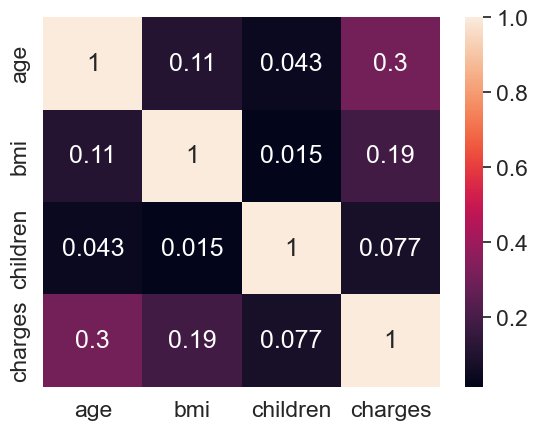

In [60]:
cols = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5) 
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [4]:
df = pd.get_dummies(df, columns= ['sex', 'smoker', 'region'], drop_first=True)


In [5]:
df.rename(columns={'sex_male':'sex','smoker_yes':'smoker'},
               inplace=True)
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex', 'smoker',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

##### Creando el modelo

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(columns = ['charges'])
y = df[['charges']]

In [74]:
""" Modelo con la variable y estandarizada """
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# sc_x = StandardScaler().fit(X_train)
# sc_y = StandardScaler().fit(y_train)

# X_train = sc_x.transform(X_train)
# X_test = sc_x.transform(X_test)

# y_train = sc_y.transform(y_train)
# y_test = sc_y.transform(y_test)

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [14]:
print('La pendiente del modelo es igual a:', model.coef_)
print('el intercepto del modelo es: ', model.intercept_)

La pendiente del modelo es igual a: [[3621.59955464 1646.63974048  711.69096765   19.37453343 9060.88703393
  -204.65827136 -553.36151933 -521.70423073]]
el intercepto del modelo es:  [12847.9461205]


In [86]:
y_pred.shape

(333, 1)

##### Evaluando el modelo

In [11]:
import sklearn.metrics as metrics

In [15]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2: ', r2.round(5))
print('mse: ', mse.round(4))

r2:  0.76398
mse:  34957618.9203
